# Git clone

In [1]:
!git clone https://github.com/truongcntn2017/EnTube

fatal: destination path 'EnTube' already exists and is not an empty directory.


In [2]:
cd EnTube/notebook

/content/EnTube/notebook


In [3]:
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import package 

In [4]:
from datetime import datetime as dt

import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data 

In [5]:
PATH = '../sample_data/entube_final.parquet'

In [6]:
df = pd.read_parquet(PATH)

# Data Understading

## sample 

In [7]:
df.columns = ['channel_id', 'channel_name', 'channel_category', 'channel_started',
       'channel_rank', 'channel_subscribers', 'id', 'title', 'title_length',
       'categories', 'description', 'tags', 'num_tags', 'upload_date',
       'delta_upload_date', 'duration', 'view_count', 'like_count',
       'comment_count', 'dislike_count', 'like_per_view', 'comment_per_view',
       'dislike_per_view', 'cl_engagement_rate', 'cld_engagement_rate', 'q_score',
       'engagement_rate_label', 'q_score_label']

In [8]:
df.head(5)

,channel_id,channel_name,channel_category,channel_started,channel_rank,channel_subscribers,id,title,title_length,categories,...,comment_count,dislike_count,like_per_view,comment_per_view,dislike_per_view,cl_engagement_rate,cld_engagement_rate,q_score,engagement_rate_label,q_score_label
0,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,nehrVdADdH0,[FAP TV ] Thông Báo Tuyển Diễn Viên Nam Film L...,14,Film & Animation,...,827,105,0.020731,0.002456,0.000312,0.023187,0.023499,0.970364,2,2
1,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,K66wOEaBwK4,Phía Sau Một Cô Gái - Soobin Hoàng Sơn | MV Fa...,14,Comedy,...,1594,664,0.010124,0.000622,0.000259,0.010746,0.011005,0.950070,1,2
2,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,D00vn3X7oI8,FAPtv Cơm Nguội: Tập 94 - Dấu Ấn Học Đường Phần 2,12,Entertainment,...,2214,3089,0.006007,0.000234,0.000326,0.006241,0.006568,0.896920,1,2
3,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G22G1k3G-kM,FAPtv Cơm Nguội: Tập 100 - Hành Trình Vui Vẻ,10,Entertainment,...,1752,2202,0.007931,0.000228,0.000287,0.008159,0.008446,0.930209,1,2
4,UC0jDoh3tVXCaqJ6oTve8ebA,FAP TV,Comedy,2014,2,12800000,G5EG7ymPErw,FAPtv Cơm Nguội: Tập 95 - Dấu Ấn Học Đường Phầ...,12,Entertainment,...,2417,2208,0.006485,0.000303,0.000277,0.006789,0.007066,0.918029,1,2


## size 

In [9]:
len(df)

23738

## missing rate 

In [10]:
df.isnull().mean()

channel_id               0.000000
channel_name             0.000000
channel_category         0.000000
channel_started          0.000000
channel_rank             0.000000
channel_subscribers      0.000000
id                       0.000000
title                    0.000000
title_length             0.000000
categories               0.000000
description              0.017609
tags                     0.000000
num_tags                 0.000000
upload_date              0.000000
delta_upload_date        0.000000
duration                 0.000000
view_count               0.000000
like_count               0.000000
comment_count            0.000000
dislike_count            0.000000
like_per_view            0.000000
comment_per_view         0.000000
dislike_per_view         0.000000
cl_engagement_rate       0.000000
cld_engagement_rate      0.000000
q_score                  0.000000
engagement_rate_label    0.000000
q_score_label            0.000000
dtype: float64

## duplicated rate 

In [11]:
1 - len(df.drop_duplicates(['id']))/len(df)

0.0

## check filter 

### likes greater dislikes 

In [12]:
assert len(df[df['like_count'] > df['dislike_count']]) / len(df) == 1

### no dislike 

In [13]:
assert len(df[df['dislike_count'] > 0]) / len(df) == 1

### duration 

In [14]:
assert len(df[df['duration'] >= 1]) / len(df) == 1

# EDA 

## label 

In [15]:
pd.options.display.float_format = '{:,.6f}'.format
percentiles = [0.01] + [0.05*x for x in range(1, 20)] + [0.99]

In [16]:
def get_distribution_from_label(df, label: str, value: int,columns: list):
    return df[df[label] == value][columns].describe(percentiles=percentiles)

### engagement_rate_label

#### Not Engage 

In [17]:
label = 'engagement_rate_label'
value = 0 # Not Engage
columns = ['engagement_rate_label', 'cl_engagement_rate']

In [18]:
get_distribution_from_label(df, label, value, columns)

,engagement_rate_label,cl_engagement_rate
count,"8,178.000000","8,178.000000"
mean,0.000000,0.002890
std,0.000000,0.001121
min,0.000000,0.000002
1%,0.000000,0.000497
5%,0.000000,0.001073
10%,0.000000,0.001365
15%,0.000000,0.001609
20%,0.000000,0.001846
25%,0.000000,0.002042


#### Neutral 

In [19]:
get_distribution_from_label(df, label, 1, columns)

,engagement_rate_label,cl_engagement_rate
count,"7,107.000000","7,107.000000"
mean,1.000000,0.007792
std,0.000000,0.001888
min,1.000000,0.004937
1%,1.000000,0.004989
5%,1.000000,0.005179
10%,1.000000,0.005411
15%,1.000000,0.005654
20%,1.000000,0.005900
25%,1.000000,0.006146


#### Engage

In [20]:
get_distribution_from_label(df, label, 2, columns)

,engagement_rate_label,cl_engagement_rate
count,"8,453.000000","8,453.000000"
mean,2.000000,0.028089
std,0.000000,0.040511
min,2.000000,0.011633
1%,2.000000,0.011761
5%,2.000000,0.012273
10%,2.000000,0.012939
15%,2.000000,0.013685
20%,2.000000,0.014426
25%,2.000000,0.015270


### q_score_label 

In [21]:
label = 'q_score_label'
value = 0 # Not Engage
columns = ['q_score_label', 'q_score']

#### Not Engage 

In [22]:
get_distribution_from_label(df, label, value, columns)

,q_score_label,q_score
count,"8,365.000000","8,365.000000"
mean,0.000000,0.572580
std,0.000000,0.166587
min,0.000000,0.013158
1%,0.000000,0.094802
5%,0.000000,0.184915
10%,0.000000,0.333333
15%,0.000000,0.409231
20%,0.000000,0.458300
25%,0.000000,0.500000


#### Neutral

In [23]:
get_distribution_from_label(df, label, 1, columns)

,q_score_label,q_score
count,"6,949.000000","6,949.000000"
mean,1.000000,0.837657
std,0.000000,0.036972
min,1.000000,0.764745
1%,1.000000,0.767857
5%,1.000000,0.777715
10%,1.000000,0.782609
15%,1.000000,0.791127
20%,1.000000,0.800000
25%,1.000000,0.806452


#### Engage 

In [24]:
get_distribution_from_label(df, label, 2, columns)

,q_score_label,q_score
count,"8,424.000000","8,424.000000"
mean,2.000000,0.937025
std,0.000000,0.023348
min,2.000000,0.894777
1%,2.000000,0.896371
5%,2.000000,0.900183
10%,2.000000,0.905411
15%,2.000000,0.910105
20%,2.000000,0.914600
25%,2.000000,0.918473


## channel 

In [25]:
channel_df = (df
    .groupby(['channel_id'])
    .agg({'id': lambda x: x.nunique(),
          'channel_name': 'first',
          'channel_category': 'first',
          'channel_started': 'first',
          'channel_rank': 'first', 
          'channel_subscribers': 'first'})
)

channel_df = channel_df.reset_index()
channel_df.columns = [
    'channel_id', 'num_videos', 'channel_name',
    'channel_category', 'channel_started', 'channel_rank', 'channel_subscribers'              
]

In [26]:
channel_df.describe(percentiles=percentiles)

,num_videos,channel_started,channel_rank,channel_subscribers
count,72.000000,72.000000,72.000000,72.000000
mean,329.694444,"2,013.819444","1,576.930556","859,009.388889"
std,349.159378,3.045784,990.928407,"1,838,520.951069"
min,11.000000,"2,006.000000",2.000000,"10,000.000000"
1%,11.000000,"2,006.710000",16.200000,"10,142.000000"
5%,29.550000,"2,009.000000",77.200000,"14,565.000000"
10%,41.100000,"2,010.000000",108.600000,"15,600.000000"
15%,56.950000,"2,010.000000",152.350000,"19,190.000000"
20%,70.200000,"2,011.000000",185.200000,"21,859.000000"
25%,87.750000,"2,011.750000",258.750000,"28,450.000000"


In [27]:
channel_df = (df
    .groupby(['channel_id'])
    .agg({'id': lambda x: x.nunique(),
          'channel_name': 'first',
          'channel_category': 'first',
          'channel_started': 'first',
          'channel_rank': 'first', 
          'channel_subscribers': 'first',
          'title_length': 'median',
          'num_tags': 'median',
          'delta_upload_date': 'median',
          'duration': 'median',
          'view_count': 'median',
          'like_count': 'median',
          'comment_count': 'median',
          'dislike_count': 'median',
          'like_per_view': 'median',
          'comment_per_view': 'median',
          'dislike_per_view': 'median',
          'cl_engagement_rate': 'median',
          'cld_engagement_rate': 'median',
          'q_score': 'median'})
)

In [28]:
channel_df = channel_df.reset_index()
channel_df.columns = [
    'channel_id', 
    'num_videos', 
    'channel_name',
    'channel_category', 
    'channel_started', 
    'channel_rank', 
    'channel_subscribers',
    'median_title_length', 
    'median_num_tags',
    'median_delta_upload_date',
    'median_duration',
    'median_view_count',
    'median_like_count', 
    'median_comment_count', 
    'median_dislike_count',
    'median_like_per_view', 
    'median_comment_per_view',
    'median_dislike_per_view', 
    'median_cl_engagement_rate',
    'median_cld_engagement_rate', 
    'median_q_score'     
]

### by channel_cate 

In [29]:
channel_cate_df = (channel_df
    .groupby(['channel_category'])
    .agg({
        'channel_name': 'count',
        'channel_started': 'min',
        'channel_rank': 'median',
        'channel_subscribers': 'median',
        'num_videos': 'median'
    })
)

In [30]:
channel_cate_df = channel_cate_df.reset_index()

In [31]:
channel_cate_df.columns = [
    'channel_category', 'num_channels', 'min_channel_started', 
    'median_channel_rank', 'median_channel_subscribers', 'median_num_videos'
]

## video 

### by channel_cate 

In [32]:
channel_cate_df = (df
    .groupby(['channel_category'])
    .agg({
        'id': 'count',
        'title_length': 'median',
        'num_tags': 'median',
        'delta_upload_date': 'median',
        'duration': 'median',
        'view_count': 'median',
        'like_count': 'median',
        'comment_count': 'median',
        'dislike_count': 'median',
        'like_per_view': 'median',
        'comment_per_view': 'median',
        'dislike_per_view': 'median',
    })
)

In [33]:
channel_cate_df = channel_cate_df.reset_index()

In [34]:
channel_cate_df.columns = [
    'channel_category', 'num_videos',
    'median_title_length', 'median_num_tags',
    'median_delta_upload_date', 'median_duration',
    'median_view_count', 'median_like_count', 
    'median_comment_count', 'median_dislike_count',
    'median_like_per_view', 'median_comment_per_view',
    'median_dislike_per_view', 
]

In [35]:

channel_cate_df.T

,0,1,2,3
channel_category,Comedy,Education,Science & Technology,Travel & Events
num_videos,6604,3881,8449,4804
median_title_length,17.000000,14.000000,12.000000,15.000000
median_num_tags,13.000000,13.000000,9.000000,12.000000
median_delta_upload_date,916.000000,"1,129.000000","1,483.000000",870.000000
median_duration,17.966667,9.016667,5.950000,13.883333
median_view_count,"140,783.000000","61,817.000000","28,233.000000","8,974.000000"
median_like_count,745.500000,403.000000,103.000000,63.000000
median_comment_count,44.000000,20.000000,32.000000,9.000000
median_dislike_count,81.000000,27.000000,12.000000,5.000000


## correlation 

### by video 

In [36]:
def plot_corr(df, columns, label: str = ' by video'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap="Blues", vmin=-1, vmax=1)
    plt.xlabel('Engagement Metrics' + label, size = 15)
    plt.ylabel('Engagement Metrics' + label, size = 15)
    plt.title('Pearson correlation coefficient of Engagement Metrics' + label, size = 15)
    plt.show()

In [37]:
columns = [
    'channel_subscribers',
    'delta_upload_date',
    'view_count',
    'like_count',
    'comment_count',
    'dislike_count'
]

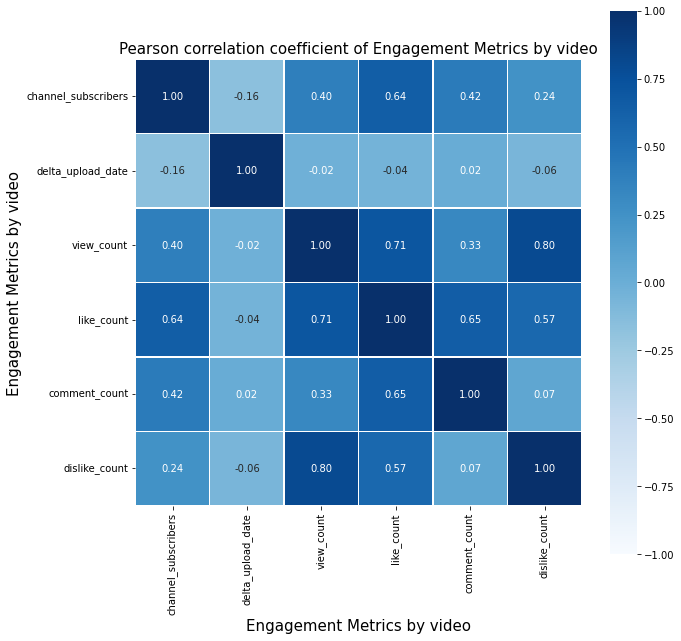

In [38]:
plot_corr(df, columns)

In [39]:
columns = [
    'channel_subscribers',
    'delta_upload_date',
    'cl_engagement_rate',
    'cld_engagement_rate',
    'q_score'
]

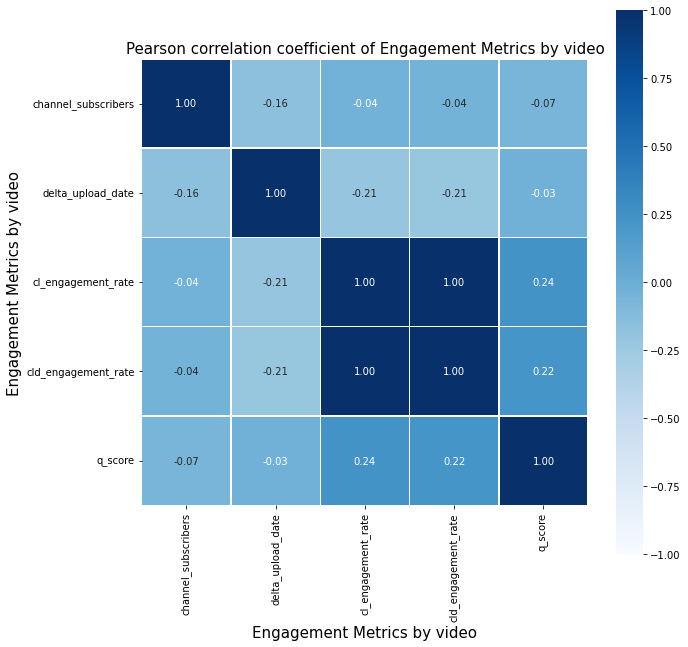

In [40]:
plot_corr(df, columns)

### by channel 

In [41]:
channel_df = (df
    .groupby(['channel_id'])
    .agg({
        'channel_subscribers': 'first',
        'channel_category': 'first',
        'channel_name': 'first',
        'delta_upload_date': 'median',
        'view_count': 'median',
        'like_count': 'median',
        'comment_count': 'median',
        'dislike_count': 'median',
        'cl_engagement_rate': 'median',
        'cld_engagement_rate': 'median',
        'q_score': 'median'})
)

channel_df = channel_df.reset_index()
channel_df.columns = [
    'channel_id', 'channel_subscribers', 'channel_category', 'channel_name', 'median_delta_upload_date',
    'median_view_count', 'median_like_count', 'median_comment_count', 'median_dislike_count',
    'median_cl_engagement_rate', 'median_cld_engagement_rate', 'median_q_score'              
]

In [42]:
columns = [
    'channel_subscribers',
    'median_delta_upload_date',
    'median_view_count',
    'median_like_count',
    'median_comment_count',
    'median_dislike_count'
]

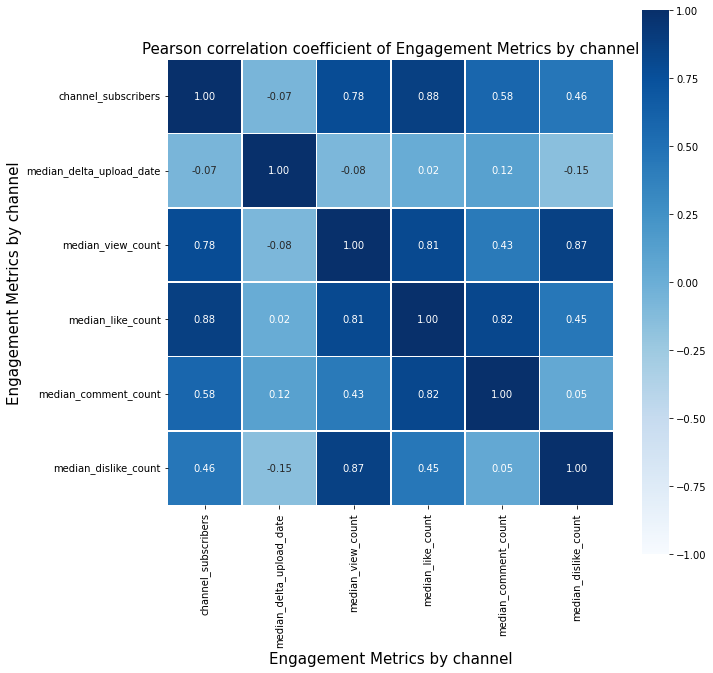

In [43]:
plot_corr(channel_df, columns, label=' by channel')

In [44]:
columns = [
    'channel_subscribers',
    'median_delta_upload_date',
    'median_cl_engagement_rate',
    'median_cld_engagement_rate',
    'median_q_score'
]

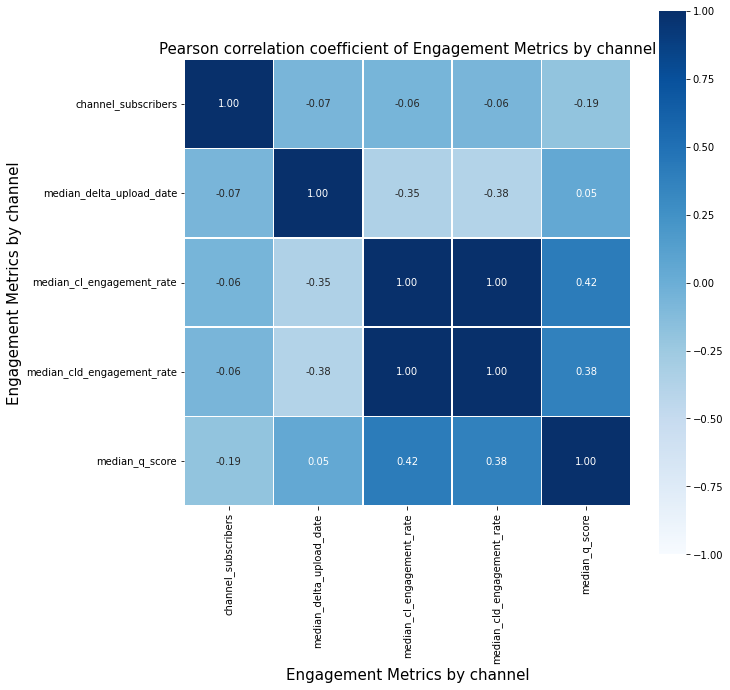

In [45]:
plot_corr(channel_df, columns, label=' by channel')

## by time series 

### number of videos 

In [46]:
df['upload_date_by_year'] = df['upload_date'].dt.year

In [47]:
channel_cate_by_time_series_df = (df
    .groupby(['channel_category','upload_date_by_year'])
    .agg({
        'id': 'count',
        'cl_engagement_rate': 'median',
        'cld_engagement_rate': 'median',
        'q_score': 'median',
    })
)

channel_cate_by_time_series_df = channel_cate_by_time_series_df.reset_index()
channel_cate_by_time_series_df.columns = [
    'channel_category', 'upload_date_by_year',
    'num_videos', 'median_cl_engagement_rate',
    'median_cld_engagement_rate', 'median_q_score'                                          
]

In [48]:
fig = px.line(channel_cate_by_time_series_df, x='upload_date_by_year', y='num_videos', color='channel_category')
fig.update_layout(title="Number of video by channel category and time series")
fig.update_layout(xaxis_title="Year of updoad date")
fig.update_layout(yaxis_title="Number of videos")
fig.show()

### cl_engagement_rate

In [49]:
fig = px.line(channel_cate_by_time_series_df, x='upload_date_by_year', y='median_cl_engagement_rate', color='channel_category')
fig.update_layout(title="Median cl engagement rate by channel category and time series")
fig.update_layout(xaxis_title="Year of updoad date")
fig.update_layout(yaxis_title="Median cl engagement rate")
fig.show()

### cld_engagement_rate

In [50]:
fig = px.line(channel_cate_by_time_series_df, x='upload_date_by_year', y='median_cld_engagement_rate', color='channel_category')
fig.update_layout(title="Median cld engagement rate by channel category and time series")
fig.update_layout(xaxis_title="Year of updoad date")
fig.update_layout(yaxis_title="Median cld engagement rate")
fig.show()

### q_score 

In [51]:
fig = px.line(channel_cate_by_time_series_df, x='upload_date_by_year', y='median_q_score', color='channel_category')
fig.update_layout(title="Median Q score by channel category and time series")
fig.update_layout(xaxis_title="Year of updoad date")
fig.update_layout(yaxis_title="Median Q score")
fig.update_yaxes(range = [0, 1])
fig.show()

# Train and test split 

In [52]:
train_df = df[df['upload_date'].dt.year < 2020]
val_df = df[df['upload_date'].dt.year == 2020]
test_df = df[df['upload_date'].dt.year > 2020]
columns = ['id', 'title', 'tags','engagement_rate_label', 'q_score_label', 'title_length', 'num_tags']

In [53]:
train_df = train_df[columns]
val_df = val_df[columns]
test_df = test_df[columns]

In [54]:
len(train_df)

17025

In [55]:
len(val_df)

3908

In [56]:
len(test_df)

2805

In [57]:
train_df['q_score_label'].value_counts(normalize=True)

0   0.347195
2   0.334567
1   0.318238
Name: q_score_label, dtype: float64

In [58]:
val_df['q_score_label'].value_counts(normalize=True)

2   0.397134
0   0.367707
1   0.235159
Name: q_score_label, dtype: float64

In [59]:
test_df['q_score_label'].value_counts(normalize=True)

2   0.419251
0   0.362567
1   0.218182
Name: q_score_label, dtype: float64

In [60]:
train_df['title_length'].describe()

count   17,025.000000
mean        13.527812
std          4.491985
min          1.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         27.000000
Name: title_length, dtype: float64

In [61]:
val_df['title_length'].describe()

count   3,908.000000
mean       15.883828
std         4.662537
min         2.000000
25%        12.000000
50%        16.000000
75%        20.000000
max        27.000000
Name: title_length, dtype: float64

In [62]:
test_df['title_length'].describe()

count   2,805.000000
mean       16.686275
std         4.627722
min         1.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        27.000000
Name: title_length, dtype: float64

In [63]:
train_df['num_tags'].describe()

count   17,025.000000
mean        11.201762
std          6.585051
min          1.000000
25%          6.000000
50%         10.000000
75%         16.000000
max         41.000000
Name: num_tags, dtype: float64

In [64]:
val_df['num_tags'].describe()

count   3,908.000000
mean       14.384340
std         7.651394
min         1.000000
25%         8.000000
50%        15.000000
75%        20.000000
max        42.000000
Name: num_tags, dtype: float64

In [65]:
test_df['num_tags'].describe()

count   2,805.000000
mean       14.468449
std         6.449587
min         1.000000
25%        10.000000
50%        14.000000
75%        19.000000
max        39.000000
Name: num_tags, dtype: float64